# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice_times(times):
    results = []
    for i in range(times):
        result = random.randint(1, 6)
        results.append(result)
    return results

results = roll_dice_times(10)

df = pd.DataFrame(results)
df

,0
0,2
1,5
2,1
3,5
4,2
5,3
6,2
7,1
8,3
9,2


#### 2.- Plot the results sorted by value.

In [3]:
# your code here

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [29]:
# your code here
df.columns = ["Column1"]
frequency_distribution = df.iloc[:,0].value_counts().to_dict()
print(frequency_distribution)

{2: 4, 1: 2, 3: 2, 5: 2}


In [5]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean_function(dataframe1, column_name):
    total = 0
    count = 0

    for i in dataframe1[column_name]:
        total = i + total
        count+=1
    
    mean = total / count
    
    return mean

mean_function(df, "Column1")

2.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [30]:
# your code here

# Calculate the frequency distribution
def frequency_distribution_calculator(df,col):
    frequency_distribution = {}
    for i in df[col]:
        if i in frequency_distribution:
            frequency_distribution[i] += 1
        else:
            frequency_distribution[i] = 1
    
    return frequency_distribution


def sum_and_count_calculator(df,col):
    frequency_distribution=frequency_distribution_calculator(df,col)
    sum_of_all=0
    count=0
    for value, frequency in frequency_distribution.items():
        sum_of_all+= value*frequency
        count+= frequency
    return sum_of_all, count

sum_of_all, count = sum_and_count_calculator(df,"Column1")

mean = sum_of_all / count
mean

2.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [73]:
# your code here
df.sort_values(by=['Column1'], ascending = True, inplace=True)

def length_calculator(dataframe1):
    count=0
    for i in dataframe1["Column1"]:
        count+=1
    return count

def median_calculator(df):
    count1 = length_calculator(df)
    if count1%2==0:
        #calculation if you have even number of values
        return (df.iloc[int((count1/2) - 1)]["Column1"] + df.iloc[int((count1/2))]["Column1"]) / 2
    else:
        #calculation if you have odd number of values
        return df.iloc[int((count1/2) - 0.5)]["Column1"]

median_calculator(df)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [74]:
# This function first calculates the median (q2) using the median_calculator function. Then it splits the dataframe into two halves based on the number of rows (n). If n is even, it splits the dataframe into two halves of equal size. If n is odd, it splits the dataframe into a lower half with n//2 rows and an upper half with n//2 + 1 rows. Finally, it calculates the median of the lower and upper halves to get the first (q1) and third quartiles (q3), respectively.
def quartile_calculator(df):
    count1 = length_calculator(df)
    q2 = median_calculator(df)
    if count1%2 == 0:
        lower_half_length = int(count1/2)
        lower_half = df.iloc[:lower_half_length]
        upper_half = df.iloc[lower_half_length:]
    else:
        lower_half_length = int((count1-1)/2)
        lower_half = df.iloc[:lower_half_length]
        upper_half = df.iloc[lower_half_length + 1:]
    q1 = median_calculator(lower_half)
    q3 = median_calculator(upper_half)
    return q1, q2, q3

q1, q2, q3 = quartile_calculator(df)
print("Q1:", q1)
print("Q2 (Median):", q2)
print("Q3:", q3)

Q1: 2
Q2 (Median): 2.0
Q3: 3


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot: xlabel='roll'>

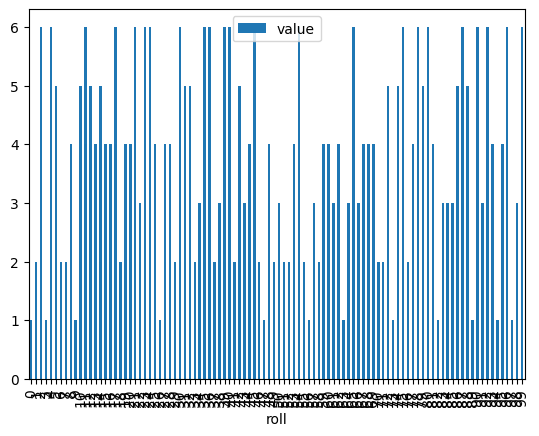

In [62]:
df2 = pd.read_csv("roll_the_dice_hundred.csv")

df2.plot(x='roll', y='value', kind='bar')

In [63]:
"""
We can see the each roll but doesn't give much information to us with a bar chart.
"""

"\nWe can see the each roll but doesn't give much information to us with a bar chart.\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [66]:
# your code here
mean_dice=mean_function(df2,"value")
mean_dice

3.74

#### 3.- Now, calculate the frequency distribution.


In [37]:
# your code here
frequency_distribution_calculator(df2,"value")

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

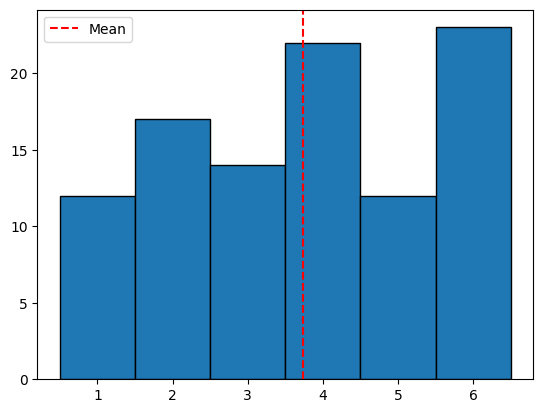

In [67]:
# your code here
import matplotlib.pyplot as plt

plt.hist(df2["value"], bins=6, edgecolor='black', range=(0.5, 6.5))
# vertical line for the mean
plt.axvline(mean_dice, color='red', linestyle='--', label='Mean')
# legend
plt.legend()

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

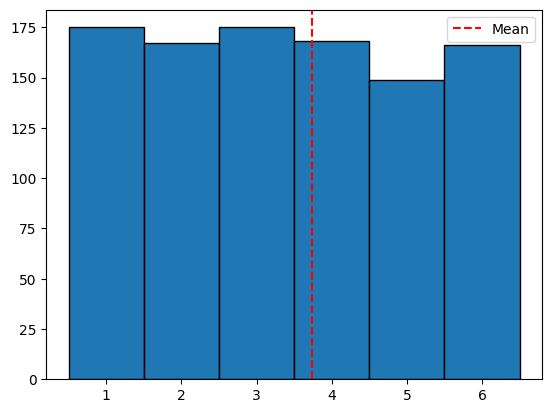

In [68]:
# your code here
df2 = pd.read_csv("roll_the_dice_thousand.csv")
df2

plt.hist(df2["value"], bins=6, edgecolor='black', range=(0.5, 6.5))
# vertical line for the mean
plt.axvline(mean_dice, color='red', linestyle='--', label='Mean')
# legend
plt.legend()

In [41]:
"""
The probabilities of rolling a number got closer to each other.
"""

'\nThe number of rolls got closer to each other because we rolled it more times.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""